# Check the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mno
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
column_to_drop = []
for element in df.columns:
    if 'txt' in element:
        column_to_drop.append(element[:-4])
df.drop(column_to_drop, axis=1, inplace=True)

In [7]:
len(df.columns)

9

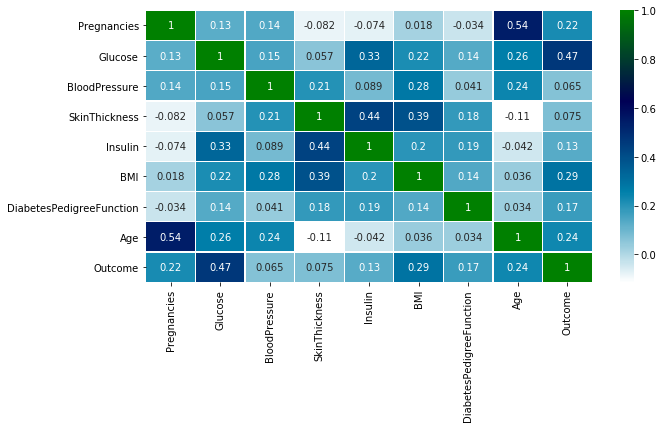

In [8]:
figure = plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap ='ocean_r', linewidth = 0.1, annot=True)

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys = ['Total','Percent'])
missing_data

,Total,Percent
Outcome,0,0.0
Age,0,0.0
DiabetesPedigreeFunction,0,0.0
BMI,0,0.0
Insulin,0,0.0
SkinThickness,0,0.0
BloodPressure,0,0.0
Glucose,0,0.0
Pregnancies,0,0.0


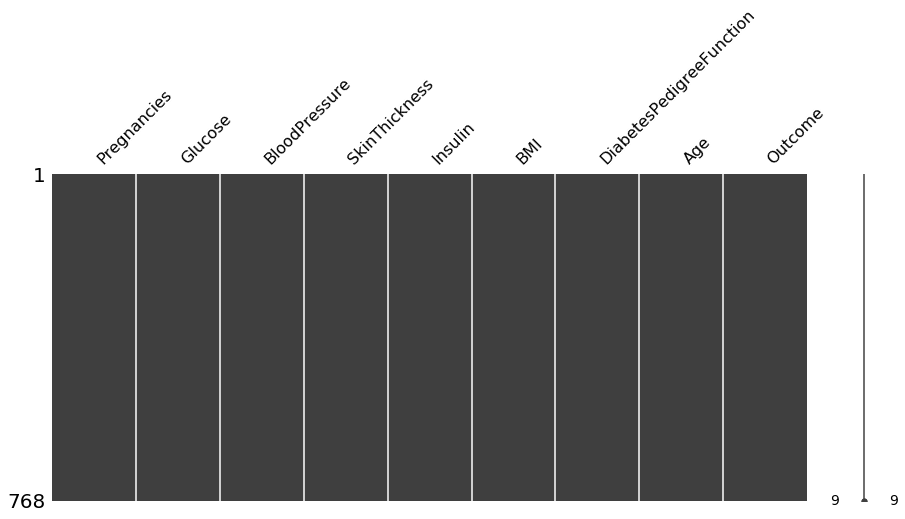

In [10]:
mno.matrix(df, figsize = (15, 6))

# Check the balance of outcome data

In [11]:
df.Outcome.value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# Test the imbalance

In [12]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

In [14]:
def awawa (X,Y,model):
    X_train,X_test,y_train,y_test = train_test_split(X,Y)
    clf = model()
    clf.fit(X_train,y_train)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_train)
    print('Class Report Test Data')
    print(classification_report(y_test, prediction_test))
    print('===========================================================')
    print('Class Report Train Data')
    print(classification_report(y_train, prediction_train))
    print('===========================================================')

In [15]:
awawa(x,y, LogisticRegression)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       123
           1       0.81      0.61      0.69        69

    accuracy                           0.81       192
   macro avg       0.81      0.76      0.78       192
weighted avg       0.81      0.81      0.80       192

Class Report Train Data
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       377
           1       0.72      0.52      0.61       199

    accuracy                           0.77       576
   macro avg       0.75      0.71      0.72       576
weighted avg       0.76      0.77      0.75       576



/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
awawa(x,y, DecisionTreeClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       132
           1       0.57      0.47      0.51        60

    accuracy                           0.72       192
   macro avg       0.67      0.65      0.66       192
weighted avg       0.71      0.72      0.72       192

Class Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       208

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [17]:
awawa(x,y, RandomForestClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       126
           1       0.74      0.53      0.62        66

    accuracy                           0.78       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192

Class Report Train Data
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       374
           1       0.99      0.97      0.98       202

    accuracy                           0.98       576
   macro avg       0.99      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576



/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
awawa(x,y, GradientBoostingClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       131
           1       0.63      0.51      0.56        61

    accuracy                           0.75       192
   macro avg       0.71      0.69      0.69       192
weighted avg       0.74      0.75      0.74       192

Class Report Train Data
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       369
           1       0.91      0.86      0.88       207

    accuracy                           0.92       576
   macro avg       0.92      0.90      0.91       576
weighted avg       0.92      0.92      0.92       576



# Repair the Imbalance

### 1. Undersampling

In [19]:
minority_data = df[df['Outcome'] == 1]
majority_data = df[df['Outcome'] == 0]

In [20]:
index_for_majority = np.random.choice(majority_data.index, len(minority_data))

In [21]:
df_major = df.loc[index_for_majority]

In [22]:
undersampling_df = pd.concat([df_major, minority_data])

In [23]:
undersampling_df['Outcome'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Outcome, dtype: float64

In [24]:
under_x = undersampling_df.drop('Outcome', axis = 1)
under_y = undersampling_df['Outcome']

In [25]:
awawa(under_x,under_y,LogisticRegression)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class Report Test Data
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        70
           1       0.76      0.80      0.78        64

    accuracy                           0.78       134
   macro avg       0.78      0.78      0.78       134
weighted avg       0.78      0.78      0.78       134

Class Report Train Data
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       198
           1       0.77      0.75      0.76       204

    accuracy                           0.76       402
   macro avg       0.76      0.76      0.76       402
weighted avg       0.76      0.76      0.76       402



In [26]:
awawa(under_x,under_y,DecisionTreeClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.67      0.82      0.74        62
           1       0.81      0.65      0.72        72

    accuracy                           0.73       134
   macro avg       0.74      0.74      0.73       134
weighted avg       0.75      0.73      0.73       134

Class Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       196

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



In [27]:
awawa(under_x,under_y,RandomForestClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.79      0.79      0.79        57

    accuracy                           0.82       134
   macro avg       0.82      0.82      0.82       134
weighted avg       0.82      0.82      0.82       134

Class Report Train Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       191
           1       1.00      0.98      0.99       211

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402



/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
awawa(under_x,under_y,GradientBoostingClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.71      0.83      0.76        64
           1       0.81      0.69      0.74        70

    accuracy                           0.75       134
   macro avg       0.76      0.76      0.75       134
weighted avg       0.76      0.75      0.75       134

Class Report Train Data
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       204
           1       0.93      0.94      0.94       198

    accuracy                           0.94       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.94      0.94      0.94       402



##### The Recall value on the test data has increased a little bit,  there's a room for improvement

### 2. ROS

In [29]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [30]:
ros = RandomOverSampler()

In [31]:
X_ros, y_ros = ros.fit_sample(x,y)

In [32]:
df_over = pd.DataFrame(X_ros,columns = x.columns)

In [33]:
df_over['Outcome'] = y_ros

In [34]:
df_over['Outcome'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Outcome, dtype: float64

In [35]:
awawa(df_over.drop('Outcome', axis = 1), df_over['Outcome'], LogisticRegression)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class Report Test Data
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       121
           1       0.75      0.74      0.75       129

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250

Class Report Train Data
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       379
           1       0.78      0.76      0.77       371

    accuracy                           0.77       750
   macro avg       0.77      0.77      0.77       750
weighted avg       0.77      0.77      0.77       750



In [36]:
awawa(df_over.drop('Outcome', axis = 1), df_over['Outcome'], DecisionTreeClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       135
           1       0.72      0.90      0.80       115

    accuracy                           0.80       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.82      0.80      0.80       250

Class Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       365
           1       1.00      1.00      1.00       385

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [37]:
awawa(df_over.drop('Outcome', axis = 1), df_over['Outcome'], RandomForestClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       140
           1       0.77      0.90      0.83       110

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250

Class Report Train Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       360
           1       1.00      0.99      0.99       390

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
awawa(df_over.drop('Outcome', axis = 1), df_over['Outcome'], GradientBoostingClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       126
           1       0.76      0.78      0.77       124

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

Class Report Train Data
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       374
           1       0.90      0.94      0.92       376

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750



##### There are 2 Overfitting models, too risky for actual usage

### 3. SMOTE

In [39]:
sm = SMOTE(random_state = 101)

In [40]:
X_sm, y_sm = sm.fit_sample(x,y)

In [41]:
df_smote = pd.DataFrame(X_sm, columns = x.columns)

In [42]:
df_smote['Outcome'] = y_sm

In [43]:
df_smote['Outcome'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Outcome, dtype: float64

In [44]:
awawa(df_smote.drop('Outcome', axis = 1), df_smote['Outcome'], LogisticRegression)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       121
           1       0.75      0.71      0.73       129

    accuracy                           0.73       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.73      0.73      0.73       250

Class Report Train Data
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       379
           1       0.77      0.76      0.76       371

    accuracy                           0.77       750
   macro avg       0.77      0.77      0.77       750
weighted avg       0.77      0.77      0.77       750



/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
awawa(df_smote.drop('Outcome', axis = 1), df_smote['Outcome'], DecisionTreeClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       117
           1       0.72      0.74      0.73       133

    accuracy                           0.71       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.71      0.71      0.71       250

Class Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       383
           1       1.00      1.00      1.00       367

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [46]:
awawa(df_smote.drop('Outcome', axis = 1), df_smote['Outcome'], RandomForestClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       124
           1       0.81      0.73      0.77       126

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250

Class Report Train Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       376
           1       1.00      0.98      0.99       374

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
awawa(df_smote.drop('Outcome', axis = 1), df_smote['Outcome'], GradientBoostingClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       122
           1       0.79      0.84      0.82       128

    accuracy                           0.80       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250

Class Report Train Data
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       378
           1       0.91      0.94      0.93       372

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750



##### There's still 2 overfitting models, lets check another algorithm

### 4. Class Weight

In [48]:
X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 101)

In [49]:
df['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [50]:
model_weight = DecisionTreeClassifier(class_weight = 'balanced', min_samples_leaf = 50, random_state = 101)

In [51]:
model_weight.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [52]:
pred_weight = model_weight.predict(X_test)

In [53]:
print(classification_report(y_test,pred_weight))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71       124
           1       0.53      0.76      0.62        68

    accuracy                           0.67       192
   macro avg       0.68      0.69      0.67       192
weighted avg       0.72      0.67      0.68       192



#####   Only 50% for the precision of '1' , this model isnt recommended

### 5. Ensemble

In [54]:
rfc = RandomForestClassifier( min_samples_leaf = 50, class_weight = 'balanced',n_estimators = 100)

In [55]:
rfc.fit(X_train,y_train)
pred_tree = rfc.predict(X_test)

In [56]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       124
           1       0.59      0.87      0.70        68

    accuracy                           0.74       192
   macro avg       0.75      0.77      0.74       192
weighted avg       0.79      0.74      0.75       192



#####   Only 63% for the precision of '1' , there are a lot of better option exclude this model

# Use the most accurate model

### SMOTE RandomForestClassifier

In [57]:
x_fix = df_smote.drop('Outcome', axis = 1)
y_fix = df_smote['Outcome']

In [58]:
X_fix_train,X_fix_test,y_fix_train,y_fix_test = train_test_split(x_fix,y_fix)
model_fix = RandomForestClassifier(n_estimators = 100)

In [59]:
model_fix.fit(X_fix_train,y_fix_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predict The Outcome

In [60]:
X_fix_test.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
457,5.0,86.0,68.0,28.0,71.0,30.2,0.364,24.0


In [61]:
model_fix.predict([[5.0,86.0,68.0,28.0,71.0,30.2,0.364,24.0]])

array([0])

In [62]:
y_fix_test.head(1)

457    0
Name: Outcome, dtype: int64

### Evaluate the model

In [64]:
pred_fix = model_fix.predict(X_fix_test)

In [67]:
print(classification_report(y_fix_test,pred_fix))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       124
           1       0.83      0.83      0.83       126

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

